# Examples of visualization of data in python

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
# pandas uses matplotlib for visualization, but still need to import it. will use it as inline fn
%matplotlib inline

#### Load data for visualization
The data is from GoC open data: https://open.canada.ca/data/en/dataset/d86dab6e-5db3-4d99-89f8-d48f6ada9315
"Selected agricultural activities, Canada, ecozones and ecoregions with agriculture"

In [261]:
df = pd.read_excel('data/open-data/01530058-eng.xlsx', dtype = {'Ref_Date': int,'GEO': str,'Geographical classification': float, 'ACTIVITIES': str,'Vector': str,'Coordinate': float,'Value': float})
df.head(5)

,Ref_Date,GEO,Geographical classification,ACTIVITIES,Vector,Coordinate,Value
0,1971,All ecoregions with agricultural activity,0.0,Average farm unit size,v44177232,1.4,1.84
1,1976,All ecoregions with agricultural activity,0.0,Average farm unit size,v44177232,1.4,1.98
2,1986,All ecoregions with agricultural activity,0.0,Cattle density (number per square kilometre),v44177994,1.1,1.99
3,1981,All ecoregions with agricultural activity,0.0,Average farm unit size,v44177232,1.4,2.00
4,1991,All ecoregions with agricultural activity,0.0,Cattle density (number per square kilometre),v44177994,1.1,2.16


In [262]:
df = df[['Ref_Date','GEO','ACTIVITIES','Value']]
df.head()

,Ref_Date,GEO,ACTIVITIES,Value
0,1971,All ecoregions with agricultural activity,Average farm unit size,1.84
1,1976,All ecoregions with agricultural activity,Average farm unit size,1.98
2,1986,All ecoregions with agricultural activity,Cattle density (number per square kilometre),1.99
3,1981,All ecoregions with agricultural activity,Average farm unit size,2.00
4,1991,All ecoregions with agricultural activity,Cattle density (number per square kilometre),2.16


In [263]:
agr_land_area = df.loc[df['ACTIVITIES'] == 'Agricultural land area']
agr_land_area.describe()
agr_land_area.head()


,Ref_Date,GEO,ACTIVITIES,Value
95,1981,All ecoregions with agricultural activity,Agricultural land area,637365.2
97,2006,All ecoregions with agricultural activity,Agricultural land area,644339.2
98,2001,All ecoregions with agricultural activity,Agricultural land area,646971.4
99,1986,All ecoregions with agricultural activity,Agricultural land area,653337.7
100,1991,All ecoregions with agricultural activity,Agricultural land area,654952.2


In [264]:
del agr_land_area['ACTIVITIES'] 
agr_land_area.head(20)

,Ref_Date,GEO,Value
95,1981,All ecoregions with agricultural activity,637365.2
97,2006,All ecoregions with agricultural activity,644339.2
98,2001,All ecoregions with agricultural activity,646971.4
99,1986,All ecoregions with agricultural activity,653337.7
100,1991,All ecoregions with agricultural activity,654952.2
101,1996,All ecoregions with agricultural activity,655010.9
102,1976,All ecoregions with agricultural activity,670015.1
103,1971,All ecoregions with agricultural activity,672120.5
147,1971,Southern Arctic ecozone,0.0
148,1976,Southern Arctic ecozone,0.0


In [265]:
df = agr_land_area[['GEO','Value']].groupby('GEO').mean()
df.head()

,Value
GEO,
"Abitibi Plains, Boreal Shield ecozone",1308.4375
"Algonquin-Lake Nipissing, Boreal Shield ecozone",3825.6625
All ecoregions with agricultural activity,654264.0250
"Annapolis-Minas Lowlands, Atlantic Maritime ecozone",1301.1875
"Anticosti Island, Boreal Shield ecozone",0.0000


In [266]:
df.columns

Index(['Value'], dtype='object')

### Visualization

Pandas' docs: https://pandas.pydata.org/pandas-docs/stable/visualization.html


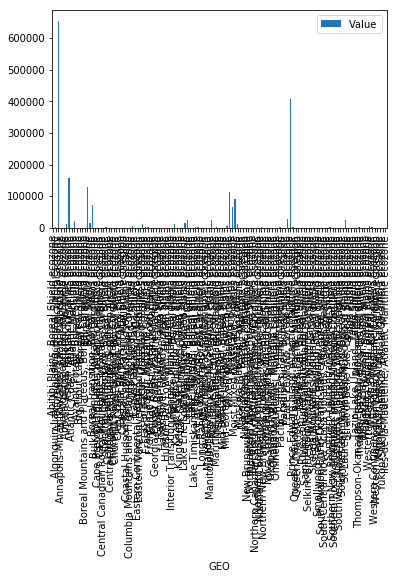

In [267]:
df.plot(kind='bar')

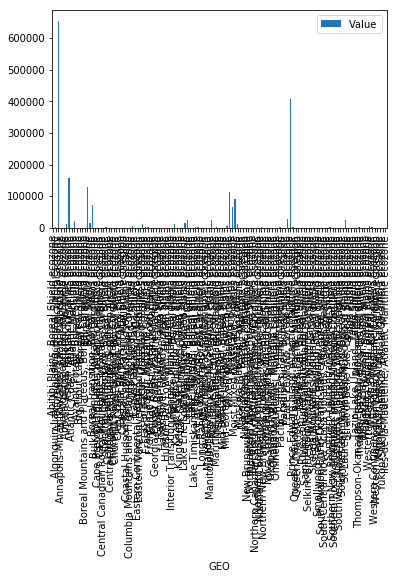

In [268]:
df.plot.bar()

In [269]:
plt.figure()

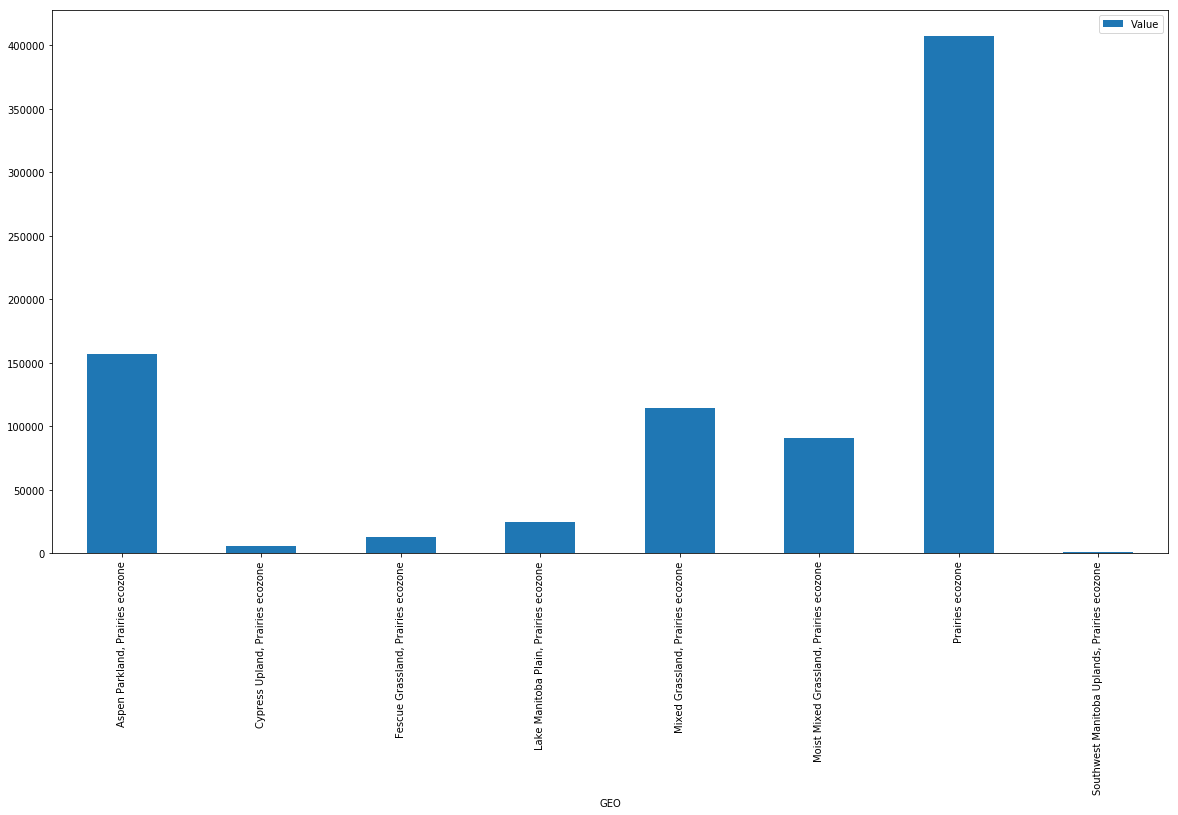

In [276]:
df.plot(kind='bar', figsize=(20,10))

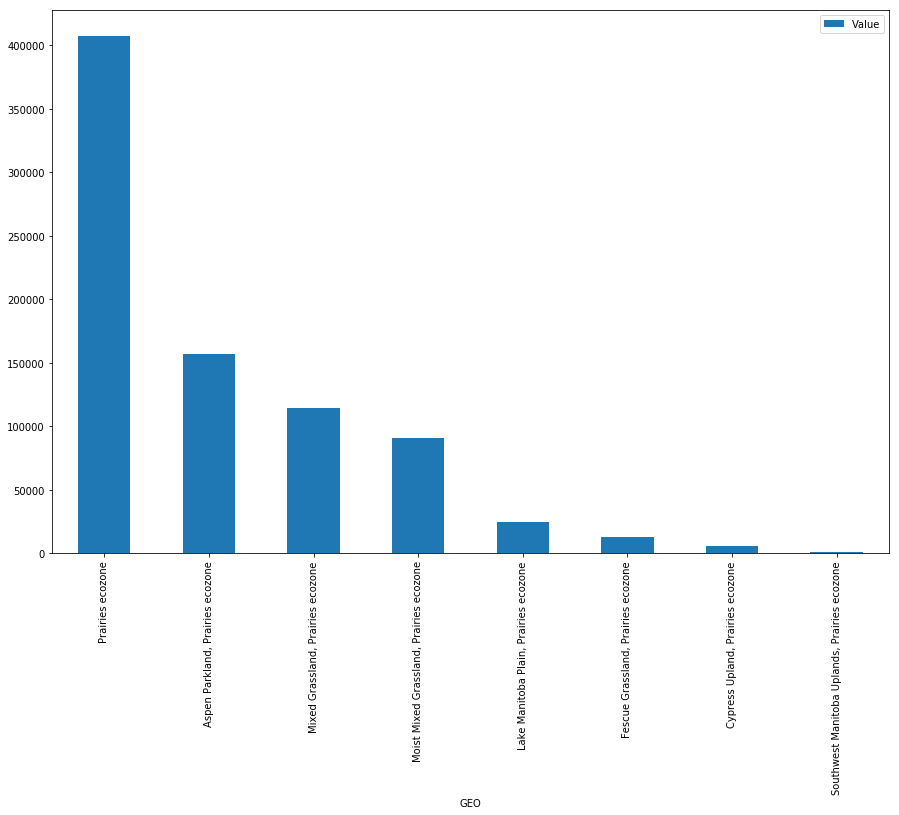

In [279]:
df.sort_values('Value', ascending=False).plot(kind='bar', figsize=(15,10))

### Filtering values

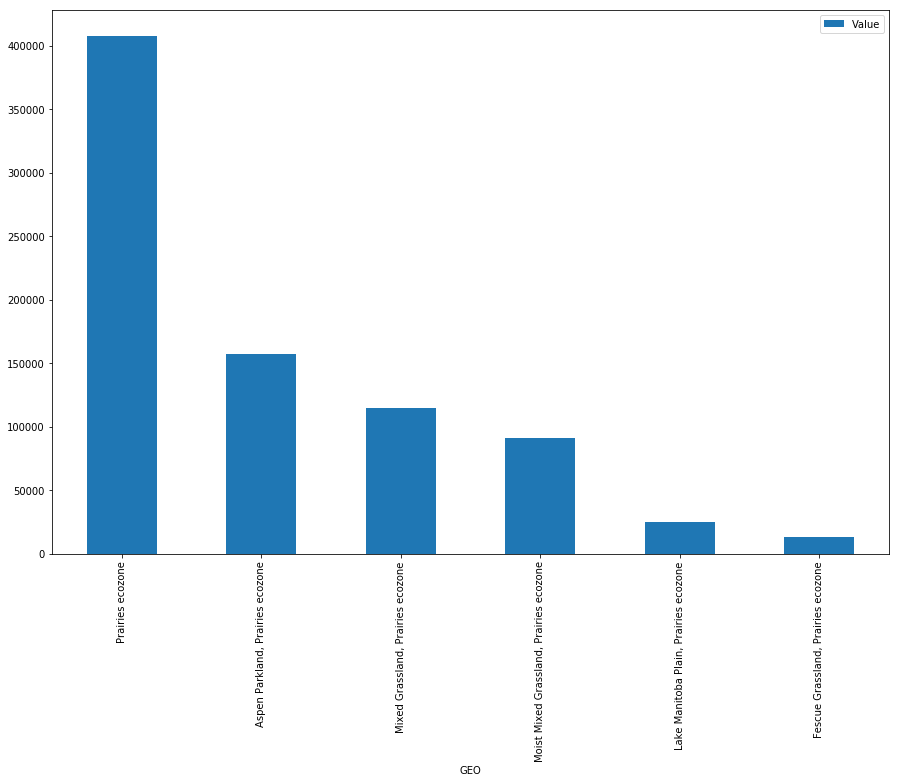

In [281]:
significant_values = df['Value'] > 10000
df[significant_values].sort_values('Value', ascending=False).plot(kind='bar', figsize=(15,10))

In [282]:
are_prairies = agr_land_area['GEO'].str.contains('Prairies')
agr_land_area[are_prairies].head()

,Ref_Date,GEO,Value
11200,1981,Prairies ecozone,397710.0
11201,2006,Prairies ecozone,403325.4
11202,2001,Prairies ecozone,403398.6
11203,1986,Prairies ecozone,407803.0
11204,1996,Prairies ecozone,408795.2


In [284]:
df = agr_land_area[are_prairies]
df = df[['GEO','Value']].groupby('GEO').mean()

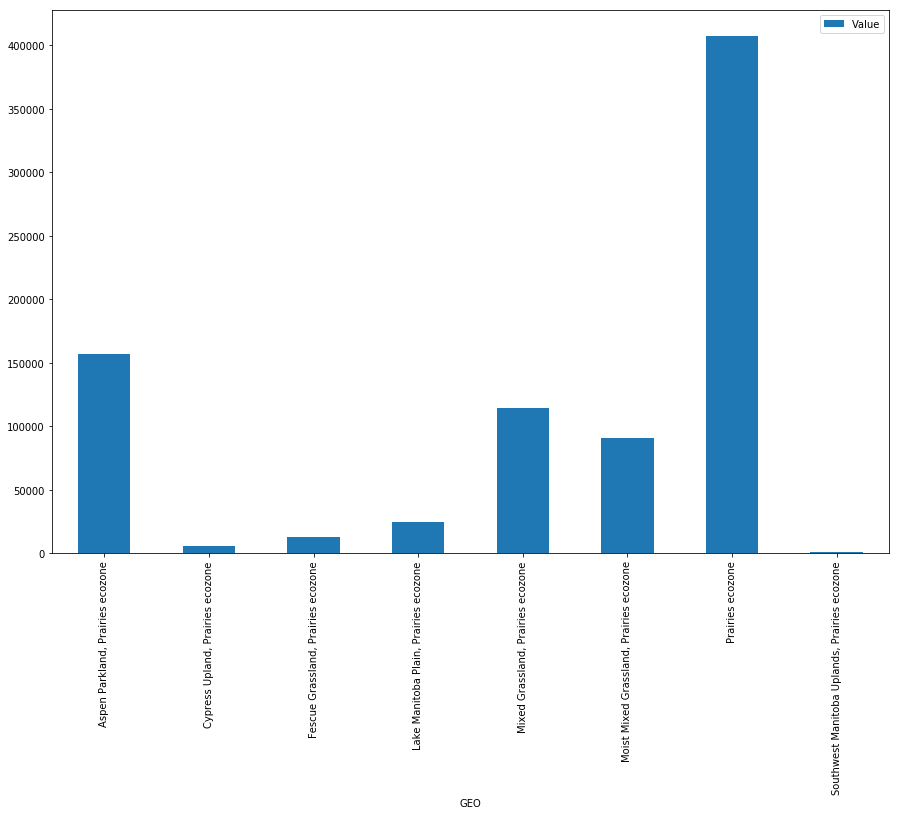

In [285]:
df.plot(kind='bar',figsize=(15,10))

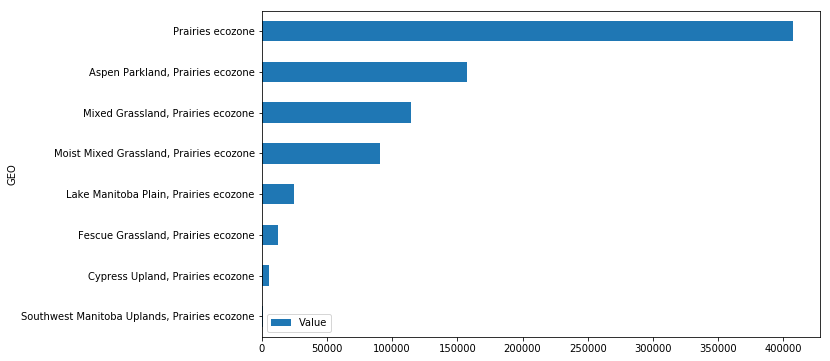

In [286]:
df.sort_values('Value').plot(kind='barh', figsize=(10,6))

#### Pies

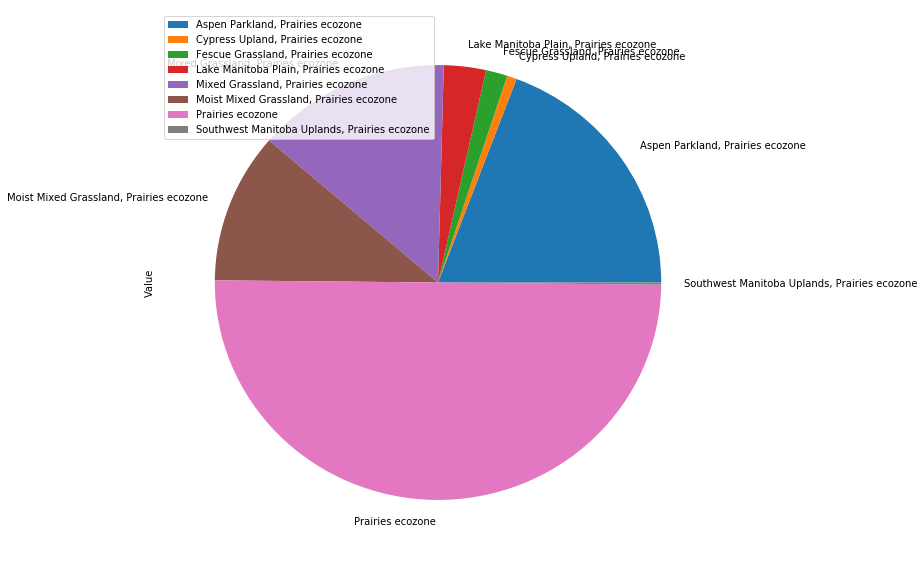

In [289]:
df.plot(kind='pie', y='Value', figsize=(10,10))

#### Positioning the legend

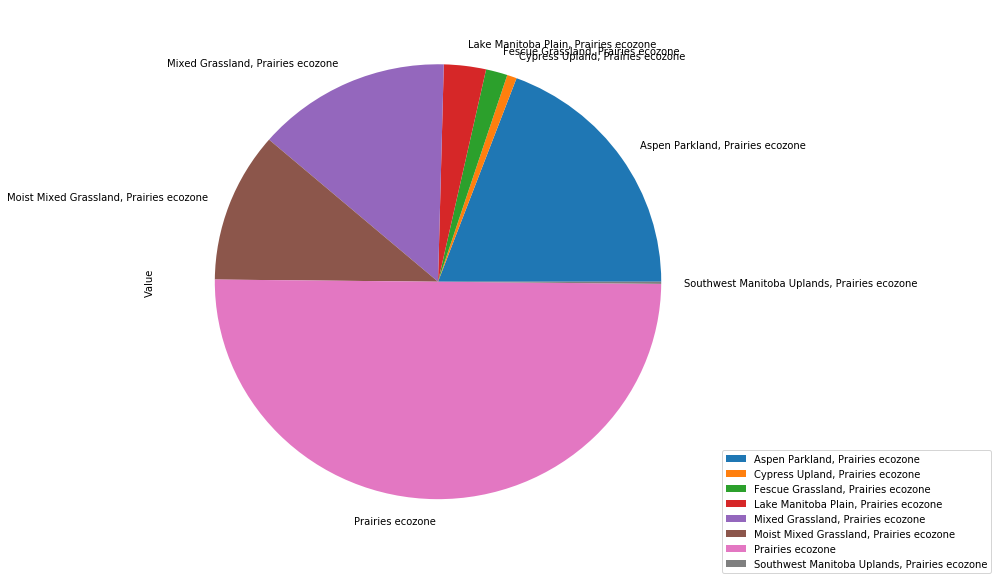

In [294]:
df.plot(kind='pie', y='Value', figsize=(10,10)).legend(bbox_to_anchor=(1.5, 0.2))

#### Not very useful for this data, but possible

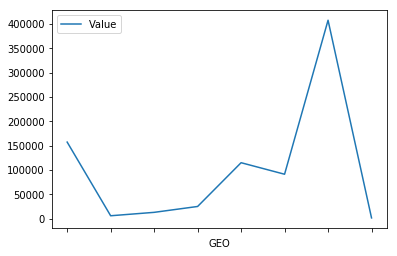

In [209]:
df.plot(kind='line')

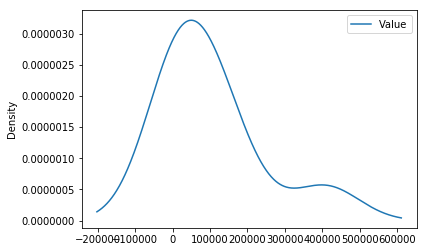

In [210]:
df.plot(kind='kde')

### Pivoting and plotting

In [295]:
df = agr_land_area[are_prairies]
significant_values = df['Value'] > 10000
df = df[significant_values]
df = df.sort_values('Value')

In [296]:
df.head()

,Ref_Date,GEO,Value
11617,1981,"Fescue Grassland, Prairies ecozone",12230.0
11618,1986,"Fescue Grassland, Prairies ecozone",12500.8
11619,1976,"Fescue Grassland, Prairies ecozone",12647.5
11620,1971,"Fescue Grassland, Prairies ecozone",12692.5
11621,2001,"Fescue Grassland, Prairies ecozone",12758.0


In [297]:
#df.pivot_table(index=["GEO"])
#df.index = df['Ref_Date']
df = df.pivot(index=df['Ref_Date'], columns='GEO')['Value']
df.head()

GEO,"Aspen Parkland, Prairies ecozone","Fescue Grassland, Prairies ecozone","Lake Manitoba Plain, Prairies ecozone","Mixed Grassland, Prairies ecozone","Moist Mixed Grassland, Prairies ecozone",Prairies ecozone
Ref_Date,,,,,,
1971,158396.5,12692.5,24902.4,118217.7,91738.5,413412.8
1976,159047.4,12647.5,24892.0,118644.3,90641.2,413926.2
1981,156766.2,12230.0,24470.1,108457.2,89247.6,397710.0
1986,156727.4,12500.8,24563.2,115665.3,91466.9,407803.0
1991,158539.4,12817.4,24789.8,116893.5,92067.8,411873.9


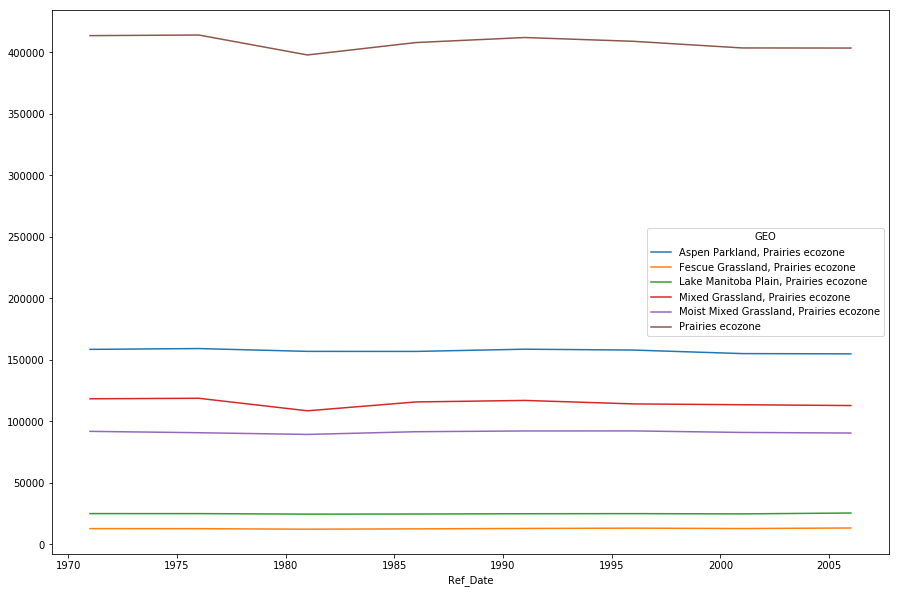

In [215]:
df.plot(figsize=(15,10))

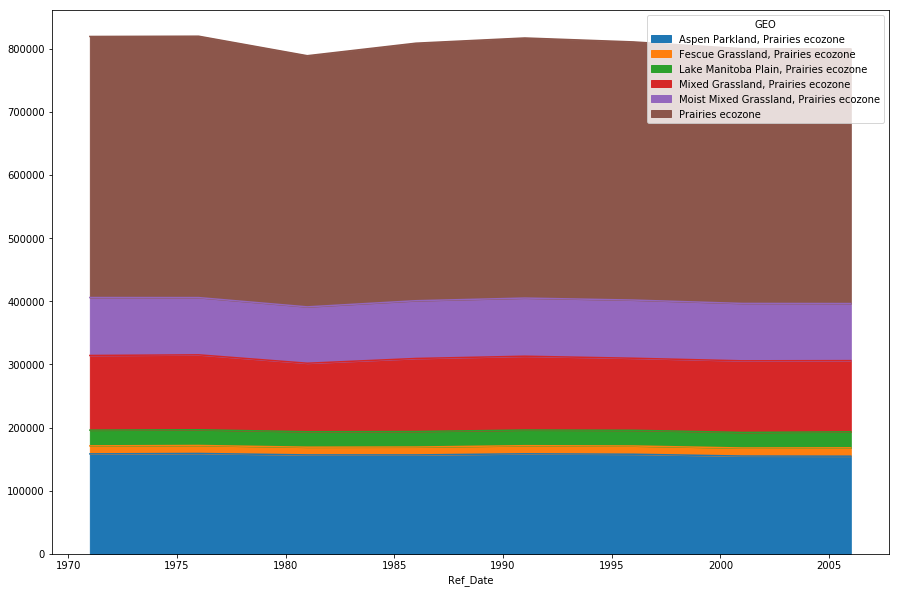

In [216]:
df.plot(kind='area', figsize=(15,10))

In [217]:
df.head()

GEO,"Aspen Parkland, Prairies ecozone","Fescue Grassland, Prairies ecozone","Lake Manitoba Plain, Prairies ecozone","Mixed Grassland, Prairies ecozone","Moist Mixed Grassland, Prairies ecozone",Prairies ecozone
Ref_Date,,,,,,
1971,158396.5,12692.5,24902.4,118217.7,91738.5,413412.8
1976,159047.4,12647.5,24892.0,118644.3,90641.2,413926.2
1981,156766.2,12230.0,24470.1,108457.2,89247.6,397710.0
1986,156727.4,12500.8,24563.2,115665.3,91466.9,407803.0
1991,158539.4,12817.4,24789.8,116893.5,92067.8,411873.9


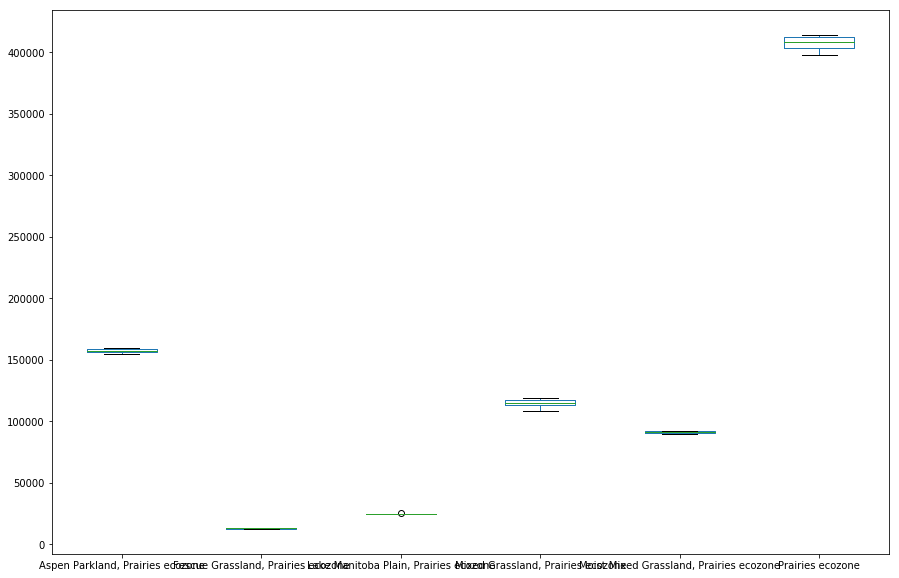

In [218]:
df.plot(kind='box', figsize=(15,10))

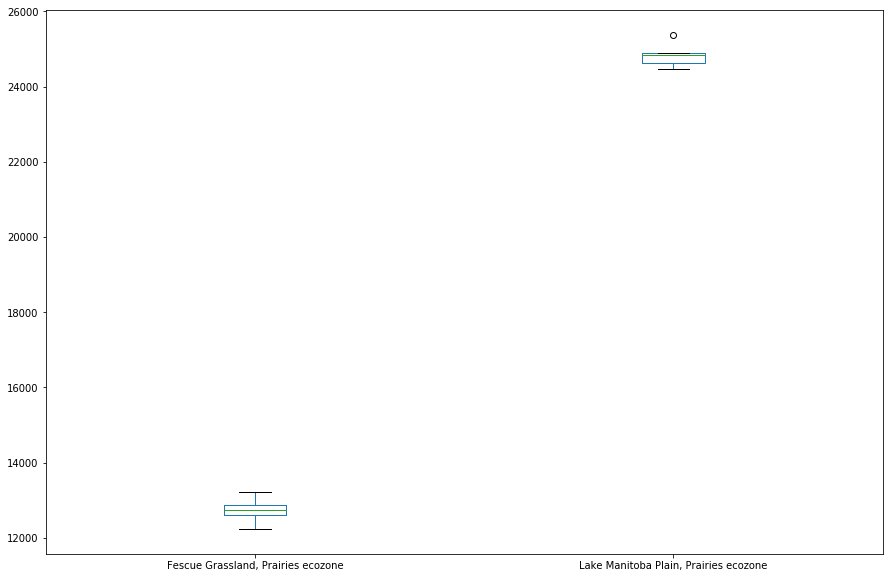

In [219]:

df1 = df[['Fescue Grassland, Prairies ecozone', 'Lake Manitoba Plain, Prairies ecozone']]
df1.plot(kind='box', figsize=(15,10))

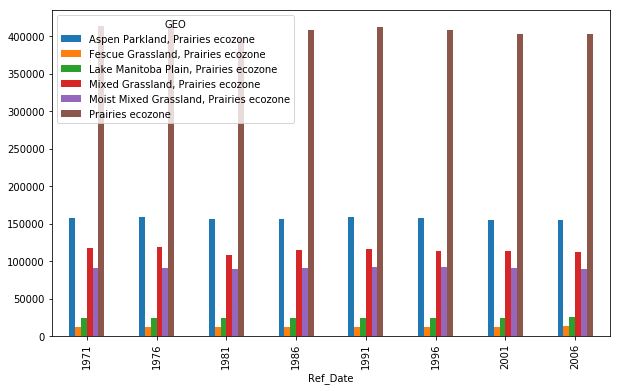

In [220]:
df.plot(kind="bar", figsize=(10,6), sort_columns=False)

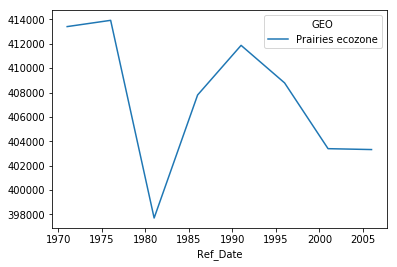

In [221]:
df.head()
df[['Prairies ecozone']].plot(kind="line")

### Density plots

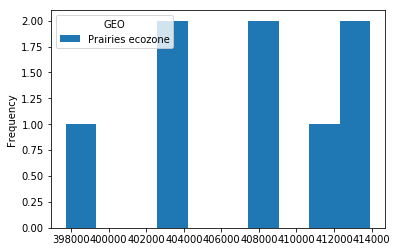

In [222]:
df[['Prairies ecozone']].plot(kind="hist")

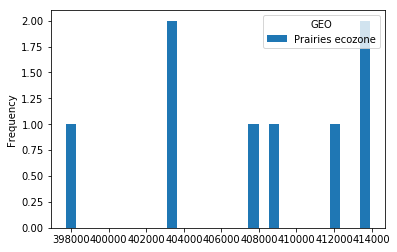

In [223]:
df[['Prairies ecozone']].plot(kind="hist", bins=30)

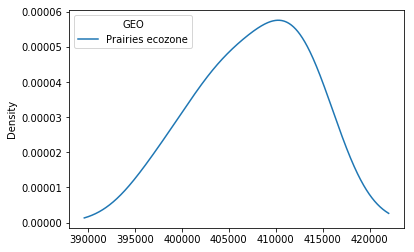

In [170]:
df[['Prairies ecozone']].plot(kind="density")